In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import io
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
up = files.upload()



Saving delivery_time.csv to delivery_time.csv


In [3]:
data = pd.read_csv(io.StringIO(up['delivery_time.csv'].decode('utf-8')))
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data =data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


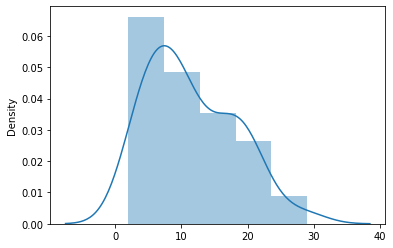

In [5]:
sns.distplot(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


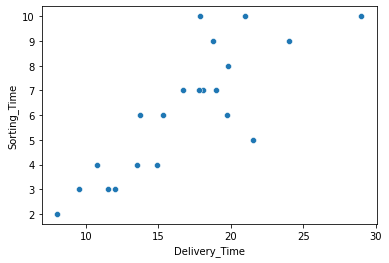

In [8]:
sns.scatterplot(x=data['Delivery_Time'],y=data['Sorting_Time'])

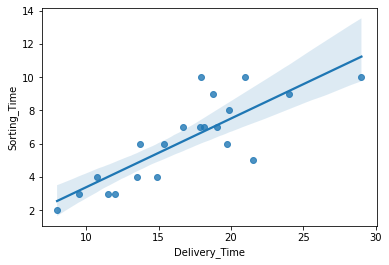

In [9]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data);

## 1. For y~x

In [10]:
model = smf.ols('Delivery_Time~Sorting_Time',data = data).fit()

In [11]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [12]:
print(model.tvalues, '\n', model.pvalues)


Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [14]:
#predict for original dataset

In [15]:
model.predict(data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

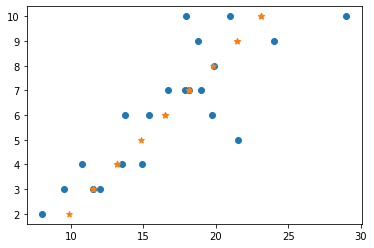

In [16]:
plt.scatter(data.Delivery_Time,data.Sorting_Time)
plt.scatter(model.predict(data),data.Sorting_Time,marker='*')
plt.show()

 ## 2. For y~np.log x

In [17]:
model = smf.ols('Delivery_Time~np.log(Sorting_Time)',data = data).fit()

In [18]:
model.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [19]:
print(model.tvalues, '\n', model.pvalues) 

Intercept               0.472460
np.log(Sorting_Time)    6.586789
dtype: float64 
 Intercept               0.641980
np.log(Sorting_Time)    0.000003
dtype: float64


In [20]:
model.predict(data)

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

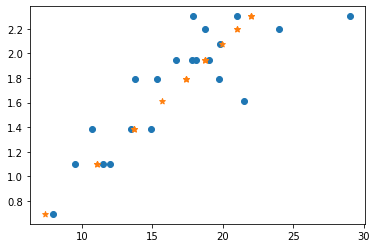

In [21]:
plt.scatter(data.Delivery_Time,np.log(data.Sorting_Time))
plt.scatter(model.predict(data),np.log(data.Sorting_Time),marker='*')
plt.show() 

## 3. For np.log(y)~x

In [22]:
y = data.Delivery_Time
x = data.Sorting_Time

In [23]:
model = smf.ols('np.log(y)~x',data = data).fit()

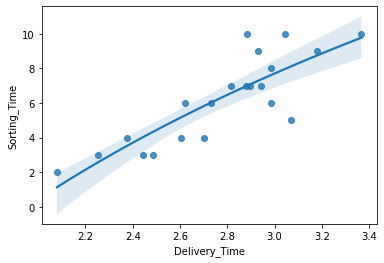

In [24]:
sns.regplot(x=np.log(y), y=x, data=data,logx=True);

In [25]:
model.params

Intercept    2.121372
x            0.105552
dtype: float64

In [26]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    20.601357
x             6.836088
dtype: float64 
 Intercept    1.857343e-14
x            1.592708e-06
dtype: float64


In [27]:
(model.rsquared,model.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [28]:
np.exp(model.predict(data))

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

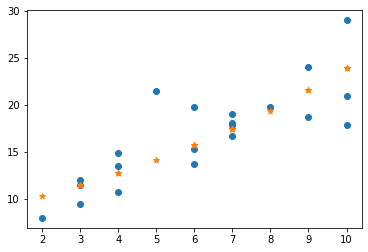

In [29]:
plt.scatter(data.Sorting_Time,(data.Delivery_Time))
plt.scatter(data.Sorting_Time,np.exp(model.predict(data)),marker='*')
plt.show()

## 4. For np.log(y)~np.log(x)

In [30]:
y = data.Delivery_Time
x = data.Sorting_Time

In [31]:
model = smf.ols('np.log(y)~np.log(x)',data = data).fit()

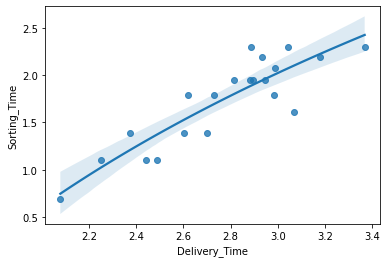

In [32]:
sns.regplot(x=np.log(y), y=np.log(x), data=data,logx=True);

In [33]:
model.params

Intercept    1.741987
np.log(x)    0.597522
dtype: float64

In [34]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    13.085552
np.log(x)     8.024484
dtype: float64 
 Intercept    5.921137e-11
np.log(x)    1.601539e-07
dtype: float64


In [35]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [36]:
np.exp(model.predict(data))

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

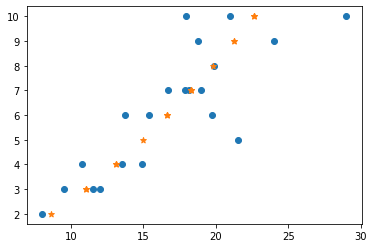

In [37]:
plt.scatter(data.Delivery_Time,data.Sorting_Time)
plt.scatter(np.exp(model.predict(data)),data.Sorting_Time,marker='*')
plt.show()

## 5. For y~np.square(x)

In [38]:
y = data.Delivery_Time
x = data.Sorting_Time

In [39]:
model = smf.ols('y~np.square(x)',data = data).fit()

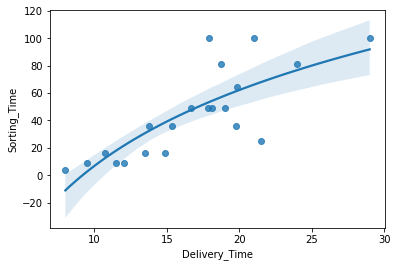

In [40]:
sns.regplot(x=y, y=np.square(x), data=data,logx=True);

In [41]:
model.params

Intercept       11.237205
np.square(x)     0.124870
dtype: float64

In [42]:
print(model.tvalues, '\n', model.pvalues)

Intercept       9.398601
np.square(x)    5.691330
dtype: float64 
 Intercept       1.415704e-08
np.square(x)    1.739194e-05
dtype: float64


In [43]:
(model.rsquared,model.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [44]:
model.predict(data)

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

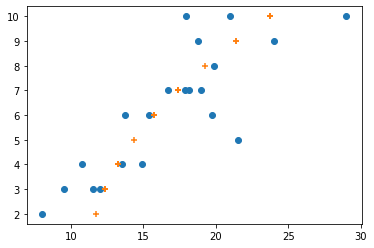

In [45]:
plt.scatter(data.Delivery_Time,data.Sorting_Time)
plt.scatter(model.predict(data),data.Sorting_Time,marker='+')
plt.show()

## 6. for np.sq(y)~x

In [46]:
y = data.Delivery_Time
x = data.Sorting_Time

In [47]:
model = smf.ols('np.square(y)~x',data = data).fit()

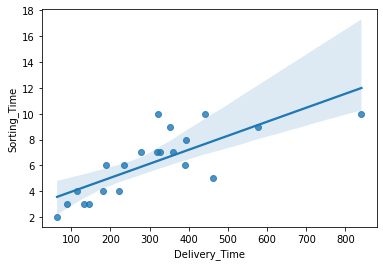

In [48]:
sns.regplot(x=np.square(y), y=x, data=data);

In [49]:
model.params

Intercept   -37.440078
x            55.553783
dtype: float64

In [50]:
print(model.tvalues, '\n', model.pvalues) 

Intercept   -0.542504
x            5.368383
dtype: float64 
 Intercept    0.593778
x            0.000035
dtype: float64


In [51]:
(model.rsquared,model.rsquared_adj)

(0.6026728443618878, 0.5817608888019872)

In [52]:
np.sqrt(model.predict(data))

0     22.761761
1     13.593199
2     17.201239
3     21.506835
4     22.761761
5     17.201239
6     18.746637
7     11.367553
8     22.761761
9     21.506835
10    20.173998
11    13.593199
12    18.746637
13    11.367553
14    11.367553
15    13.593199
16    17.201239
17    18.746637
18     8.582977
19    18.746637
20    15.502543
dtype: float64

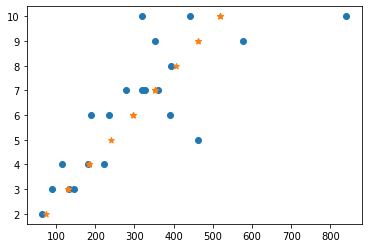

In [53]:
plt.scatter(np.square(data.Delivery_Time),data.Sorting_Time)
plt.scatter(model.predict(data),data.Sorting_Time,marker='*')
plt.show()

## 7. For np.sq(y)~np.sq(x)

In [54]:
y = data.Delivery_Time
x = data.Sorting_Time

In [55]:
model = smf.ols('np.square(y)~np.square(x)',data = data).fit()

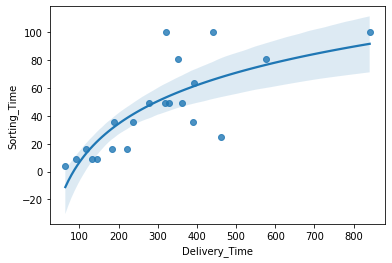

In [56]:
sns.regplot(x=np.square(y), y=np.square(x), data=data,logx=True);

In [57]:
model.params

Intercept       114.154847
np.square(x)      4.323874
dtype: float64

In [58]:
print(model.tvalues, '\n', model.pvalues) 

Intercept       2.523810
np.square(x)    5.209376
dtype: float64 
 Intercept       0.020675
np.square(x)    0.000050
dtype: float64


In [59]:
(model.rsquared,model.rsquared_adj)

(0.5881883446986836, 0.566514047051246)

In [60]:
np.sqrt(model.predict(data))

0     23.378243
1     13.540193
2     16.426025
3     21.549678
4     23.378243
5     16.426025
6     18.056153
7     12.372135
8     23.378243
9     21.549678
10    19.770756
11    13.540193
12    18.056153
13    12.372135
14    12.372135
15    13.540193
16    16.426025
17    18.056153
18    11.465180
19    18.056153
20    14.908108
dtype: float64

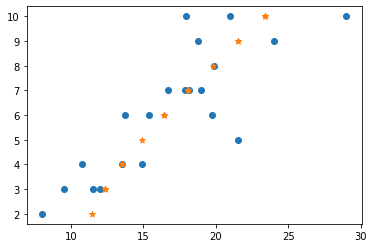

In [61]:
plt.scatter(data.Delivery_Time,data.Sorting_Time)
plt.scatter(np.sqrt(model.predict(data)),data.Sorting_Time,marker='*')
plt.show()



## 8. for y~np.power(x,3)

In [62]:
y = data.Delivery_Time
x = data.Sorting_Time

In [63]:
model = smf.ols('y~np.power(x,3)',data = data).fit()

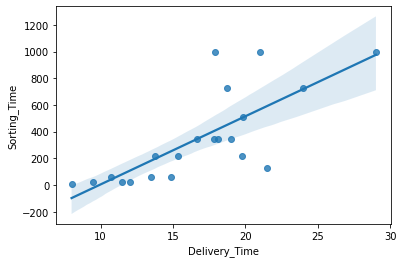

In [64]:
sns.regplot(x=y, y=np.power(x,3), data=data);

In [65]:
model.params

Intercept         12.868192
np.power(x, 3)     0.011138
dtype: float64

In [66]:
print(model.tvalues, '\n', model.pvalues) 

Intercept         11.89017
np.power(x, 3)     5.00458
dtype: float64 
 Intercept         3.025690e-10
np.power(x, 3)    7.869103e-05
dtype: float64


In [67]:
(model.rsquared,model.rsquared_adj)

(0.5686309930618969, 0.5459273611177862)

In [68]:
model.predict(data)

0     24.006370
1     13.581036
2     15.274039
3     20.987924
4     24.006370
5     15.274039
6     16.688587
7     13.168923
8     24.006370
9     20.987924
10    18.570939
11    13.581036
12    16.688587
13    13.168923
14    13.168923
15    13.581036
16    15.274039
17    16.688587
18    12.957298
19    16.688587
20    14.260465
dtype: float64

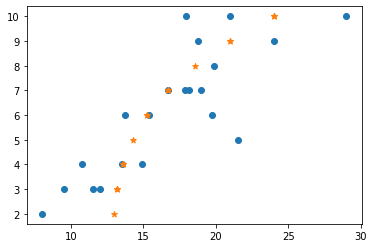

In [69]:
plt.scatter(data.Delivery_Time,data.Sorting_Time)
plt.scatter((model.predict(data)),data.Sorting_Time,marker='*')
plt.show()

## The transformation for np.log(y)~np.log(x) gives the best r-squared value and hence can be accepted.